ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller

In [2]:
dataset = pd.read_csv("Data/BTC-USD.csv")
print(dataset.shape)
dataset.head()

(1827, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-21,800.643982,834.281006,799.405029,834.281006,834.281006,155576000
1,2016-12-22,834.179993,875.781982,834.148987,864.539978,864.539978,200027008
2,2016-12-23,864.888000,925.117004,864.677002,921.984009,921.984009,275564000
3,2016-12-24,922.179993,923.479004,886.335022,898.822021,898.822021,137727008
4,2016-12-25,899.651978,899.651978,862.424011,896.182983,896.182983,143664992


In [3]:
dataset["Date"]=pd.to_datetime(dataset['Date'])
dataset['Year'] = dataset['Date'].dt.year
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2016-12-21,800.643982,834.281006,799.405029,834.281006,834.281006,155576000,2016
1,2016-12-22,834.179993,875.781982,834.148987,864.539978,864.539978,200027008,2016
2,2016-12-23,864.888000,925.117004,864.677002,921.984009,921.984009,275564000,2016
3,2016-12-24,922.179993,923.479004,886.335022,898.822021,898.822021,137727008,2016
4,2016-12-25,899.651978,899.651978,862.424011,896.182983,896.182983,143664992,2016
...,...,...,...,...,...,...,...,...
1822,2021-12-17,47653.730469,48004.894531,45618.214844,46202.144531,46202.144531,32902725329,2021
1823,2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,26098292690,2021
1824,2021-12-19,46853.867188,48089.664063,46502.953125,46707.015625,46707.015625,25154053861,2021
1825,2021-12-20,46707.062500,47401.718750,45579.808594,46880.277344,46880.277344,30961902129,2021


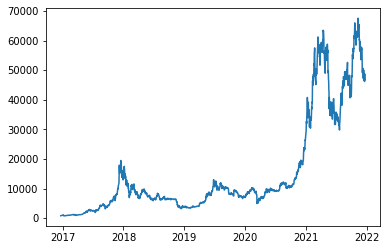

In [4]:
plt.plot(dataset['Date'],dataset['Close'])

In [5]:
ts = dataset['Close'].copy()

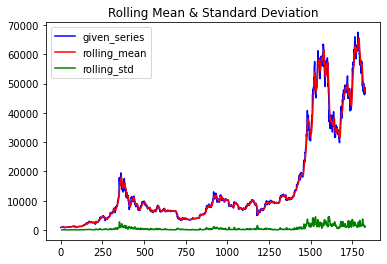

Results of Dickey-Fuller Test:
Test Statistic                   -0.602678
p-value                           0.870376
#Lags Used                       24.000000
Number of Observations Used    1802.000000
Critical Value (1%)              -3.433984
Critical Value (5%)              -2.863145
Critical Value (10%)             -2.567625
dtype: float64


In [6]:
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
      
test_for_stationary(ts)

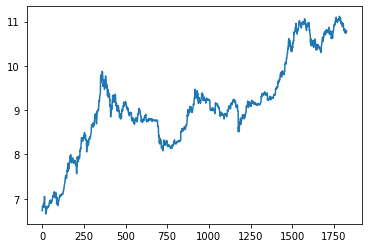

In [7]:
ts_log = np.log(ts)
plt.plot(ts_log)

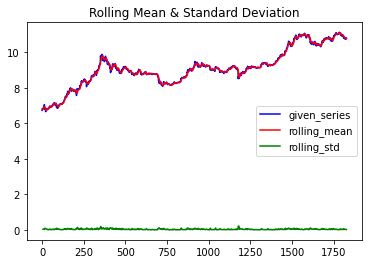

Results of Dickey-Fuller Test:
Test Statistic                   -1.489247
p-value                           0.538824
#Lags Used                        2.000000
Number of Observations Used    1824.000000
Critical Value (1%)              -3.433940
Critical Value (5%)              -2.863126
Critical Value (10%)             -2.567614
dtype: float64


In [8]:
test_for_stationary(ts_log)

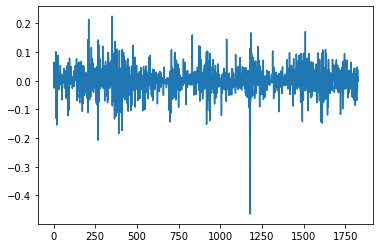

In [9]:
ts_log_diff = ts_log -ts_log.shift()
plt.plot(ts_log_diff)

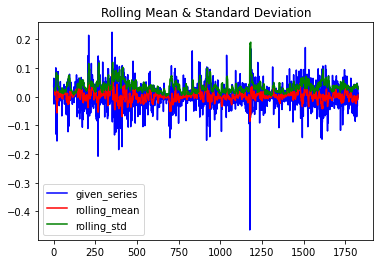

Results of Dickey-Fuller Test:
Test Statistic                  -29.709082
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1824.000000
Critical Value (1%)              -3.433940
Critical Value (5%)              -2.863126
Critical Value (10%)             -2.567614
dtype: float64


In [10]:
ts_log_diff.dropna(inplace=True)
test_for_stationary(ts_log_diff)

In [11]:
 #model = ARIMA(ts_log_diff, order = (4, 2, 1))
  #  model_fit = model.fit()
   # output = model_fit.forecast()
    #yhat = output
    #model_predictions.append(yhat)
    #actual_test_value = testing_data[i]
    #training_data.append(actual_test_value)

In [12]:
ts_log.describe()

count    1827.000000
mean        9.102952
std         1.045728
min         6.656414
25%         8.579142
50%         9.059022
75%         9.514032
max        11.120872
Name: Close, dtype: float64

### Split Data

In [13]:
#df = dataset[['Close']].copy()

In [14]:
#df.describe()

In [15]:
to_row = int(len(ts_log)*0.9)
training_data = list(ts_log[0:to_row])
testing_data = list(ts_log[to_row:])

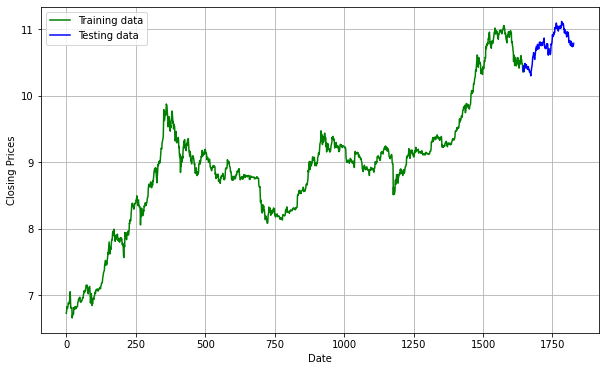

In [16]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Closing Prices")
plt.plot(ts_log[0:to_row],'green',label="Training data")
plt.plot(ts_log[to_row:],'blue',label="Testing data")
plt.legend()

### ARIMA

In [18]:
len(training_data)

1644

In [17]:
len(testing_data)

183

In [19]:
model_predictions=[]
error_list=[]
n_test_observ = len(testing_data)

In [20]:
for i in range (n_test_observ):
    model = ARIMA(training_data, order = (4, 2, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)
    
    # Calculating the error
    error = ((abs(yhat - actual_test_value)) / actual_test_value) * 100
    
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (yhat, actual_test_value, error), '%')
    
    
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

predicted = 10.366735,   expected = 10.389170,   error = 0.215937  %
predicted = 10.384017,   expected = 10.425936,   error = 0.402064  %
predicted = 10.426967,   expected = 10.453412,   error = 0.252977  %
predicted = 10.455421,   expected = 10.362107,   error = 0.900529  %
predicted = 10.368094,   expected = 10.379295,   error = 0.107925  %
predicted = 10.376287,   expected = 10.453043,   error = 0.734293  %
predicted = 10.452964,   expected = 10.446809,   error = 0.058912  %
predicted = 10.450948,   expected = 10.487595,   error = 0.349427  %
predicted = 10.487973,   expected = 10.464269,   error = 0.226523  %
predicted = 10.469142,   expected = 10.421451,   error = 0.457617  %
predicted = 10.423613,   expected = 10.431083,   error = 0.071617  %
predicted = 10.430703,   expected = 10.453588,   error = 0.218919  %
predicted = 10.454702,   expected = 10.471292,   error = 0.158434  %
predicted = 10.473026,   expected = 10.426617,   error = 0.445096  %
predicted = 10.427323,   expected 

predicted = 11.039268,   expected = 11.070724,   error = 0.284134  %
predicted = 11.073013,   expected = 11.097301,   error = 0.218872  %
predicted = 11.100999,   expected = 11.038274,   error = 0.568254  %
predicted = 11.044299,   expected = 11.013572,   error = 0.278992  %
predicted = 11.015737,   expected = 11.025061,   error = 0.084576  %
predicted = 11.026916,   expected = 11.017495,   error = 0.085509  %
predicted = 11.020294,   expected = 11.051522,   error = 0.282570  %
predicted = 11.052738,   expected = 11.008145,   error = 0.405092  %
predicted = 11.013759,   expected = 10.976481,   error = 0.339619  %
predicted = 10.978489,   expected = 11.012415,   error = 0.308072  %
predicted = 11.013253,   expected = 11.038560,   error = 0.229258  %
predicted = 11.041436,   expected = 11.033095,   error = 0.075600  %
predicted = 11.036948,   expected = 11.023844,   error = 0.118863  %
predicted = 11.027184,   expected = 11.018701,   error = 0.076980  %
predicted = 11.021667,   expected 

In [21]:
yhat

10.755029319193943

In [22]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1826
Model:                 ARIMA(4, 2, 1)   Log Likelihood                3179.657
Date:                Tue, 04 Jan 2022   AIC                          -6347.314
Time:                        20:44:51   BIC                          -6314.261
Sample:                             0   HQIC                         -6335.121
                               - 1826                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0381      0.017     -2.237      0.025      -0.072      -0.005
ar.L2          0.0300      0.020      1.469      0.142      -0.010       0.070
ar.L3         -0.0064      0.021     -0.304      0.7

In [23]:
len(model_predictions)

183

In [24]:
len(testing_data)

183

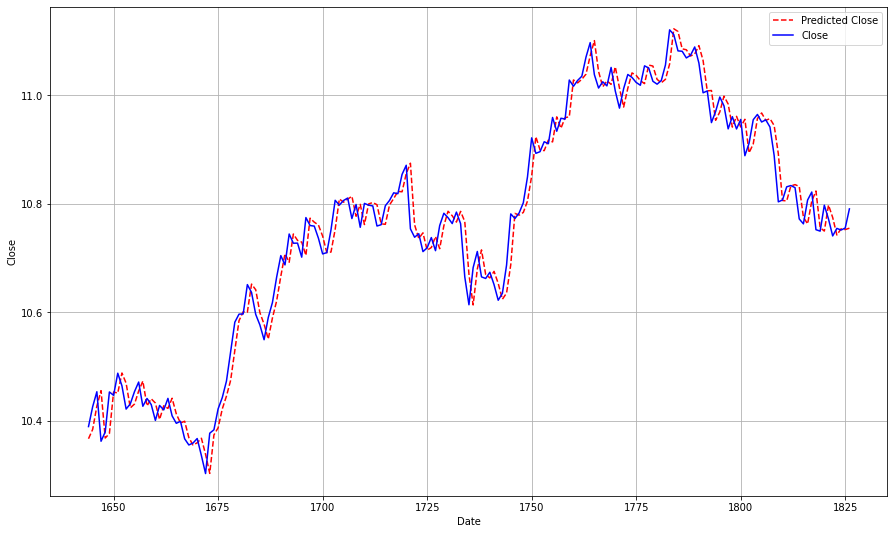

In [25]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = ts_log[to_row:].index

plt.plot(data_range,model_predictions,color = 'red', linestyle = 'dashed',label='Predicted Close')
plt.plot(data_range,testing_data,color = 'blue',label='Close')

plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

In [26]:
model_predictions=[]
len(model_predictions)

0

In [27]:
for i in range (n_test_observ):
    model2 = ARIMA(training_data,order=(4,2,2))
    model_fit = model2.fit()
    output = model_fit.forecast()
    yhat2 = output[0]
    model_predictions.append(yhat2)
    actual_test_value2 = testing_data[i]
    training_data.append(actual_test_value2)
    
    # Calculating the error
    error2 = ((abs(yhat2 - actual_test_value2)) / actual_test_value2) * 100
    
    error_list.append(error2)
    print('predicted = %f,   expected = %f,   error = %f ' % (yhat2, actual_test_value2, error2), '%')
    
    
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

predicted = 10.791503,   expected = 10.389170,   error = 3.872623  %
predicted = 10.403879,   expected = 10.425936,   error = 0.211565  %
predicted = 10.413421,   expected = 10.453412,   error = 0.382562  %
predicted = 10.453548,   expected = 10.362107,   error = 0.882454  %
predicted = 10.360621,   expected = 10.379295,   error = 0.179924  %
predicted = 10.381101,   expected = 10.453043,   error = 0.688236  %
predicted = 10.445157,   expected = 10.446809,   error = 0.015817  %
predicted = 10.450717,   expected = 10.487595,   error = 0.351629  %
predicted = 10.485104,   expected = 10.464269,   error = 0.199104  %
predicted = 10.469100,   expected = 10.421451,   error = 0.457219  %
predicted = 10.420612,   expected = 10.431083,   error = 0.100385  %
predicted = 10.431480,   expected = 10.453588,   error = 0.211492  %
predicted = 10.450119,   expected = 10.471292,   error = 0.202201  %
predicted = 10.472477,   expected = 10.426617,   error = 0.439831  %
predicted = 10.427689,   expected 

predicted = 11.038860,   expected = 11.070724,   error = 0.287814  %
predicted = 11.070288,   expected = 11.097301,   error = 0.243420  %
predicted = 11.100949,   expected = 11.038274,   error = 0.567798  %
predicted = 11.042045,   expected = 11.013572,   error = 0.258531  %
predicted = 11.017059,   expected = 11.025061,   error = 0.072582  %
predicted = 11.024418,   expected = 11.017495,   error = 0.062840  %
predicted = 11.019995,   expected = 11.051522,   error = 0.285275  %
predicted = 11.051865,   expected = 11.008145,   error = 0.397158  %
predicted = 11.012768,   expected = 10.976481,   error = 0.330592  %
predicted = 10.978303,   expected = 11.012415,   error = 0.309767  %
predicted = 11.012982,   expected = 11.038560,   error = 0.231715  %
predicted = 11.038828,   expected = 11.033095,   error = 0.051961  %
predicted = 11.036865,   expected = 11.023844,   error = 0.118116  %
predicted = 11.025961,   expected = 11.018701,   error = 0.065884  %
predicted = 11.021225,   expected 

In [28]:
yhat2

10.756301132923936

In [29]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2009
Model:                 ARIMA(4, 2, 2)   Log Likelihood                3483.860
Date:                Tue, 04 Jan 2022   AIC                          -6953.719
Time:                        20:50:05   BIC                          -6914.489
Sample:                             0   HQIC                         -6939.317
                               - 2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9172      0.157     -5.840      0.000      -1.225      -0.609
ar.L2         -0.0150      0.025     -0.603      0.546      -0.064       0.034
ar.L3          0.0215      0.026      0.839      0.4

In [30]:
len(model_predictions)

183

In [31]:
len(testing_data)

183

In [32]:
len(training_data)

2010

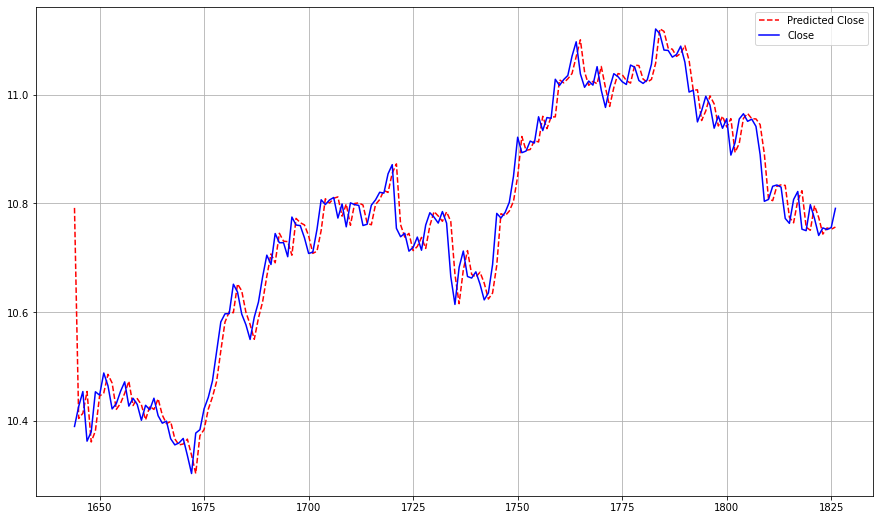

In [33]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = ts_log[to_row:].index

plt.plot(data_range,model_predictions,color = 'red', linestyle = 'dashed',label='Predicted Close')
plt.plot(data_range,testing_data,color = 'blue',label='Close')


plt.legend()
plt.show()

### Conlusion
#### It is difficult to make predictions, especially about the future ~ Niels Bohr

The first is that every forecasting model has a set of assumptions. These assumptions can be implicit or explicit, but they are there. The second is that forecasting by itself is only half the task. Often forecasting goes hand-in-hand with a decision. In this case, it would be a decision to buy, hold or sell Bitcoin. 